In [4]:
from tkinter import *
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [5]:
l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
'yellow_crust_ooze']

disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
' Migraine','Cervical spondylosis',
'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
'Impetigo']

l2=[]
for x in range(0,len(l1)):
    l2.append(0)

# TESTING DATA df -------------------------------------------------------------------------------------
df=pd.read_csv("Training.csv")

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

# print(df.head())

X= df[l1]

y = df[["prognosis"]]
np.ravel(y)
# print(y)

# TRAINING DATA tr --------------------------------------------------------------------------------
tr=pd.read_csv("Testing.csv")
tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40,  0], dtype=int64)

In [6]:

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb = gnb.fit(X,np.ravel(y))
    y_pred=gnb.predict(X_test)
    
    pickle.dump((gnb,y_pred, y_test), open('gnb2_model.pkl', 'wb'))



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 92.86%
Precision: 91.46%
Recall: 93.90%
F1 Score: 91.87%


C:\Users\Lenovo\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


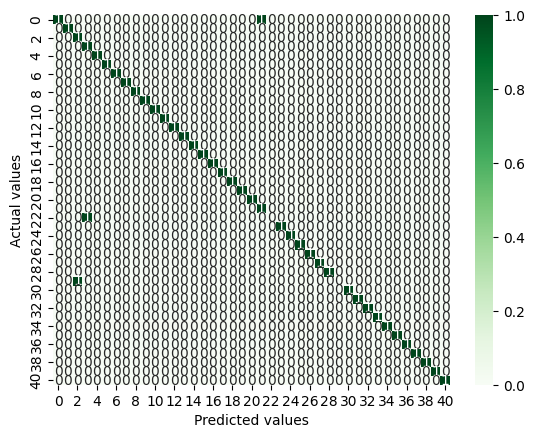

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
     
cm = confusion_matrix(y_test[0:1034], y_pred)
sns.heatmap(data=cm, annot=True, cmap='Greens')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()